# Model complexity

Maxim Panov

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

## Polynomial example

In [30]:
def f_poly(x, coefs):
    summands = [x**(power+1) * coef for power, coef in enumerate(coefs)]
    return np.array(summands).sum(0)

In [33]:
poly_coefs = [1, -0.5, -1, 0.6]
noise_std = 0.1

X = np.random.rand(20, 1) * 2 - 1
y = f_poly(X, poly_coefs)
y += np.random.randn(*y.shape) * noise_std

X_test = np.linspace(-1, 1, 100)[:, np.newaxis]
y_noiseless = f_poly(X_test, poly_coefs)
y_test = y_noiseless + np.random.randn(*y_noiseless.shape) * noise_std

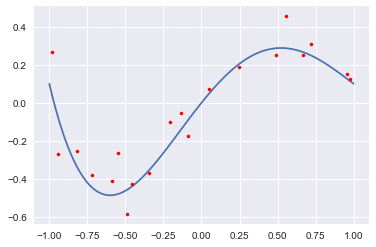

In [35]:
plt.plot(X_test, y_noiseless);
plt.plot(X, y, '.r');

#### A pipeline for a polynomial fit

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def plot_results(y_pred):
    plt.plot(X_test, y_noiseless)
    plt.plot(X_test, y_pred, '--g')
    plt.plot(X, y, '.r')

In [37]:
model = make_pipeline(PolynomialFeatures(), Ridge())

#### TODO: fit the model & plot predictions

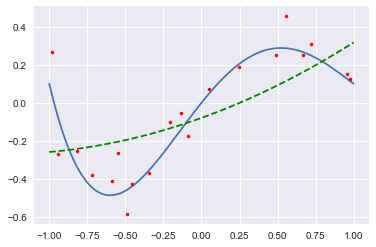

In [38]:
model.fit(X, y)
y_pred = model.predict(X_test)
plot_results(y_pred)

#### TODO: 
- import mean square error from sklearn.metrics.regression
- estimate accuracy of the prediction on
  * the train set
  * the test set
  * the noiseless version of the test set


In [39]:
from sklearn.metrics.regression import mean_squared_error as mse

print(mse(y, model.predict(X)))
print(mse(y_test, model.predict(X_test)))
print(mse(y_noiseless, model.predict(X_test)))


0.0437197977887
0.0387435738193
0.030562307148


### Bias Variance Decomposition

Expected test error for different variations of the *training data* sampled from, $\Pr(\mathbf{x}, y)$

$$\mathbb{E}\left[ (y - \hat{f}(\mathbf{x}))^2 \right].$$

Decompose as

$$\mathbb{E}\left[ (y - \hat{f}(\mathbf{x}))^2 \right] = \text{bias}\left[\hat{f}(\mathbf{x})\right]^2 + \text{variance}\left[\hat{f}(\mathbf{x})\right] +\sigma^2.$$

### Bias

- Given by
    $$\text{bias}\left[\hat{f}(\mathbf{x})\right] = \mathbb{E}\left[\hat{f}(\mathbf{x})\right] - f(\mathbf{x}).$$
    
- Error due to bias comes from a model that's too simple.

### Variance

- Given by
    $$\text{variance}\left[\hat{f}(\mathbf{x})\right] = \mathbb{E}\left[\left(\hat{f}(\mathbf{x}) -  \mathbb{E}\left[\hat{f}(\mathbf{x})\right]\right)^2\right].$$
    
- Slight variations in the training set cause changes in the prediction. Error due to variance is error in the model due to an overly complex model. 

# Bias-variance tradeoff

<div style="width:100%; text-align:center">
<img src=http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png width=500px>
</div>

Check a great tutorial http://scott.fortmann-roe.com/docs/BiasVariance.html

**Problem:** high dimension of input.

**Example:** in FMRI-based pattern recognition dimension of $\mathbf{x}$ can easily be 20000.

**Solution 1:** ridge regression
$$
  \min_{\mathbf{w}} \sum_{i = 1}^N (y^i - \mathbf{w}^T \mathbf{x}^{i})^2 + \lambda \|\mathbf{w}\|_2^2.
$$

**Problem 2:** what if we want feature selection?

**Solution 2:** LASSO
$$
  \min_{\mathbf{w}} \sum_{i = 1}^N (y^i - \mathbf{w}^T \mathbf{x}^{i})^2 + \lambda \|\mathbf{w}\|_1,
$$
where $\|\mathbf{w}\|_1 = \sum_{j = 1}^p |w_j|$.

### Lasso vs Ridge regression

<div style="width:60%; text-align:center">
<img src=https://1.bp.blogspot.com/-tXq6Nl2lcNg/V3qzttiZ4sI/AAAAAAAAN_M/6nmjgwydWJUy5Kqt9gFg2Nb12BCTcD4ogCLcB/s1600/LASSO.png>
</div>

#### TODO: try different values of parameters (degree & alpha) and find the best possible fit

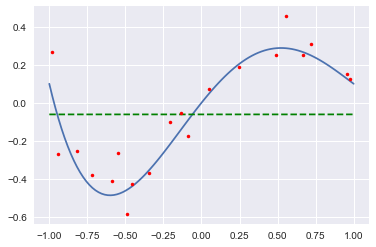

In [49]:
model = make_pipeline(PolynomialFeatures(degree=20), Ridge(alpha=100000))

model.fit(X, y)
y_pred = model.predict(X_test)
plot_results(y_pred)

#### TODO:  Estimate errors for the best possible fit, compare its errors with the previous results

#### TODO: set *alpha=1e-7*; calculate & plot three errors as functions of *degree*

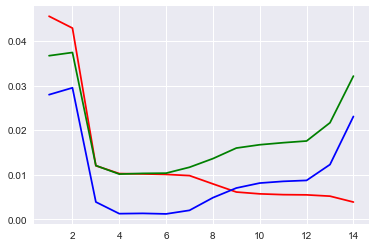

In [53]:
degree_range = range(1, 15) # 1, 2, ..., 20
errors_train = []
errors_test = []
errors_test_noiseless = []
for degree in degree_range:
    model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=1.e-9))
    model.fit(X, y)
    y_pred = model.predict(X_test)
    error = mse(y, model.predict(X))
    errors_train.append(error)
    error = mse(y_test, model.predict(X_test))
    errors_test.append(error)
    error = mse(y_noiseless, model.predict(X_test))
    errors_test_noiseless.append(error)
    
    
plt.plot(degree_range, errors_train, 'r')
plt.plot(degree_range, errors_test, 'g')
plt.plot(degree_range, errors_test_noiseless, 'b')

#### TODO: set degree=20 and try different regularization parameters alpha; plot the same lines

## Regression with Nearest Neighbours

### 1-Nearest Neighbour
* Keep the whole training dataset: ${(x, y)}$.
* A query example (vector) $q$ comes
* Find closest example(s) $x^*$.
* Predict $y^*$.

### K-Nearest Neighbours
* **Problem:** one neighbour can give unstable predictions.
* **Solution:** take $k$ nearest neighbours.
* **Output**: just predict the average output among $k$ nearest neighbors.

![image](./figures/knn.png)

## Nearest neighbours in Scikit learn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors, weights="uniform")
knn.fit(X, y)
y_ = knn.predict(X_test)

plt.scatter(X, y, c='r', label='data')
plt.plot(X_test, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))

plt.show()

## Example: Approximation of Pressure Distribution on Airfoils

In this example we demonstrate:
    
* Basic data loading and splitting
* Construction of surrogate models with multiple inputs/outputs
* Basic analysis of results

__Notes__:

* Approximation is based on real database of airfoils
* We seek to approximate the pressure distribution givean an airfoil shape
* One can also solve inverse problem (i.e. approximate airfoil shape give desired pressure distribution)

0) Imports
----------

In [ ]:
import numpy as np
import pandas as pd
from sklearn import gaussian_process, linear_model
import utils as aux

## 1) Loading data

__TODO__:

* Specify path to data (approx_pressure_distribution_X57_Y57_)
* Load the data into variable
* Determine the shape of the data (**shape** command)

## 2) Specify inputs / outputs

__TODO__:

* Put the first 57 columns to __inputs__
* Put the last 57 columns to __outputs__
* Ensure sizes of __inputs__ and __outputs__ are equal (not that everything starts from 0 in Python)
* Split dataset to test and train: __train_x__, __train_y__, __test_x__, __test_y__ (use any two airfoils for test)


_Hint: To split the dataset you need to perform slicing like X[:, :10] - which means that you take all rows and 10 first columns from X_

## 3) Build regression model

__TODO__:

* Create sklearn model for least squares estimation
* Create model using __fit__ function
* Try ridge regression and play with regularization parameter

## 4) Calculate errors on test set

__TODO__:

* Calculate mean absolute error on the __train_x__, __train_y__
* Calculate mean absolute error on the __test_x__, __test_y__

*Hint: Use abs and mean commands of numpy*

## 5) Visualize the results

In [ ]:
aux.airfoil_plotting(test_x, test_y, model.predict(test_x))

## 6) Optional

__TODO__:

* Change approximation technique
* Exchange inputs and outputs

## 7) Approximation of artificial data generated by branin function:

* $$f(x_1, x_2) = (x_2 - a  x_1^2 +  b x_1 - c)^2 +  d \cos(x_1) + e;$$
* $$x_1 \in [-5, 10], x_2 \in [0, 15];$$
* $$a = 5.1 / 4 / \pi^2;$$
* $$b = 5 / \pi;$$
* $$c = 6;$$
* $$d = 10 (1 - 1 / 8 / \pi);$$
* $$e = 10.$$

__TODO__:

* Construct approximation with linear and nonlinear technique
* Compare results